In [358]:
import numpy as np
import numpy
import matplotlib.pyplot as plt

In [430]:
import skimage.data
import matplotlib.image as mpimg 
img=skimage.data.chelsea()
img=mpimg.imread('data/cat.jpg')

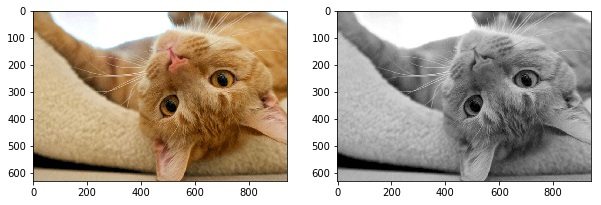

In [431]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(skimage.color.rgb2gray(img),cmap=plt.cm.gray)

In [432]:
igrey=skimage.color.rgb2gray(img)

In [433]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.21, 0.72, 0.07])

In [438]:
split=450
limg=img[:,:split,:]
rimg=img[:,split:,:]
lgrey=igrey[:,:split]*255
rgrey=igrey[:,split:]*255

In [439]:
limg_edge=limg[1:limg.shape[0]-1,1:limg.shape[1]-1,:]
rimg_edge=rimg[1:rimg.shape[0]-1,1:rimg.shape[1]-1,:]

In [440]:
grey3x3=[]
r3x3=[]
g3x3=[]
b3x3=[]
for row in range(limg.shape[0]-2):
    for col in range(limg.shape[1]-2):
        grey3x3.append(lgrey[row:row+3,col:col+3])
        r3x3.append(limg[row:row+3,col:col+3,0])
        g3x3.append(limg[row:row+3,col:col+3,1])
        b3x3.append(limg[row:row+3,col:col+3,2])

grey3x3=np.array(grey3x3)
r3x3=np.array(r3x3)
g3x3=np.array(g3x3)
b3x3=np.array(b3x3)


inputX=grey3x3.reshape((grey3x3.shape[0],9))

y_r=limg[:,:,0][1:limg.shape[0]-1,1:limg.shape[1]-1].reshape(-1)
y_g=limg[:,:,1][1:limg.shape[0]-1,1:limg.shape[1]-1].reshape(-1)
y_b=limg[:,:,2][1:limg.shape[0]-1,1:limg.shape[1]-1].reshape(-1)

In [441]:
grey3x3=[]
r3x3=[]
g3x3=[]
b3x3=[]
for row in range(rimg.shape[0]-2):
    for col in range(rimg.shape[1]-2):
        grey3x3.append(rgrey[row:row+3,col:col+3])
        r3x3.append(rimg[row:row+3,col:col+3,0])
        g3x3.append(rimg[row:row+3,col:col+3,1])
        b3x3.append(rimg[row:row+3,col:col+3,2])

grey3x3=np.array(grey3x3)
r3x3=np.array(r3x3)
g3x3=np.array(g3x3)
b3x3=np.array(b3x3)


test_X=grey3x3.reshape((grey3x3.shape[0],9))

test_r=rimg[:,:,0][1:rimg.shape[0]-1,1:rimg.shape[1]-1].reshape(-1)
test_g=rimg[:,:,1][1:rimg.shape[0]-1,1:rimg.shape[1]-1].reshape(-1)
test_b=rimg[:,:,2][1:rimg.shape[0]-1,1:rimg.shape[1]-1].reshape(-1)

In [442]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
activation_function = tanh
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
        
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None
                ):  
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        
        self.no_of_hidden_nodes = no_of_hidden_nodes
            
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
    
        
    
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural 
        network with optional bias nodes"""
        
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes + bias_node))
        
        
        
    def train(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
        
        bias_node = 1 if self.bias else 0
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )
                                    
            
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.weights_in_hidden, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        #output_vector_hidden=output_vector1
        #print(output_vector_hidden.shape)

        
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        
        
        output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        #output_vector_network= output_vector2
        #print('output',output_vector_network)
        #output_errors =target_vector - output_vector_network
        output_errors =((target_vector - output_vector_network)**2).mean(axis=1).reshape((3,1))
        #print('error',output_errors)
        
        
        #print(self.weights_in_hidden)
        # update the weights:
        tmp = output_errors * (1-output_vector_network**2) #* (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.weights_hidden_out += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.weights_hidden_out.T, output_errors)
        #print(hidden_errors.shape)
        #print(hidden_errors)
        # update the weights:
        tmp = hidden_errors * (1- output_vector_hidden**2)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:]     # ???? last element cut off, ???
        else:
            x = np.dot(tmp, input_vector.T)
        self.weights_in_hidden += self.learning_rate * x
        
       
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [1]) )
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, [[1]]) )
            
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
            
    

[[243.17928133 243.17928133 243.17928133 243.17928133 243.17928133
  243.17928133 243.17928133 243.17928133 243.17928133 243.17928133]
 [250.00278886 250.00278886 250.00278886 250.00278886 250.00278886
  250.00278886 250.00278886 250.00278886 250.00278886 250.00278886]
 [133.72603755 133.72603755 133.72603755 133.72603755 133.72603755
  133.72603755 133.72603755 133.72603755 133.72603755 133.72603755]]
2-norm: 110579.94713328453


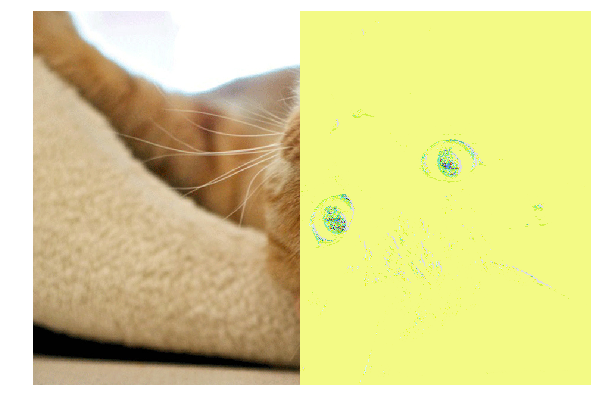

In [503]:
simple_network = NeuralNetwork(no_of_in_nodes=9, 
                               no_of_out_nodes=3, 
                               no_of_hidden_nodes=8,
                               learning_rate=0.01,
                               bias=None)
#data=[[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8],[9,9],[10,10]]

for _ in range(4):
    for i in range(20):
        #print(inputX[i])
        #print(np.array([[y_a[i]],[y_b[i]]]).shape)
        simple_network.train(inputX[i],(np.array([y_r[i],y_g[i],y_b[i]]).astype('int8'))/128)


pred=simple_network.run(test_X)*255
print(pred[:,:10])

pred_r=pred[0].reshape(rimg.shape[0]-2,rimg.shape[1]-2).astype('uint8')
pred_g=pred[1].reshape(rimg.shape[0]-2,rimg.shape[1]-2).astype('uint8')
pred_b=pred[2].reshape(rimg.shape[0]-2,rimg.shape[1]-2).astype('uint8')

pred_rimg=np.array([pred_r,pred_g,pred_b])

pred_rimg=pred_rimg.transpose((1,2,0))

compare_img=np.append(limg_edge,pred_rimg,axis=1)
plt.axis('off')

plt.imshow(compare_img)
true_rimg=np.array([rimg_edge[:,:,0],rimg_edge[:,:,1],rimg_edge[:,:,2]])
true_rimg=true_rimg.transpose((1,2,0))
print("2-norm:",np.linalg.norm(pred_rimg-true_rimg))

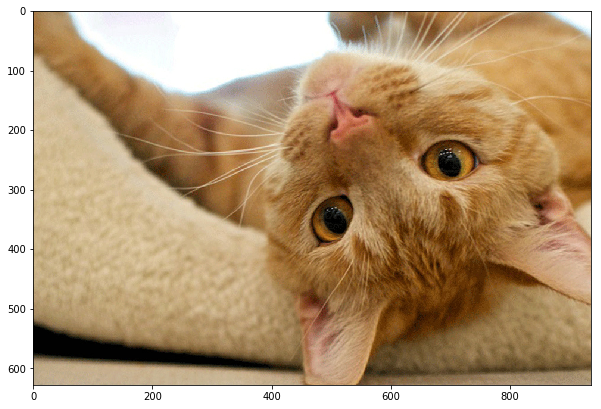

In [485]:
true_rimg=np.array([rimg_edge[:,:,0],rimg_edge[:,:,1],rimg_edge[:,:,2]])

true_rimg=true_rimg.transpose((1,2,0))

compare_img=np.append(limg_edge,true_rimg,axis=1)

plt.imshow(compare_img)

In [488]:
np.linalg.norm(pred_rimg-true_rimg)

134661.20425720245

In [227]:
pred_rimg.shape

(298, 199, 3)

In [252]:
(np.array([y_r[i],y_g[i],y_b[i]])-128)/128

array([0.140625 , 1.9609375, 1.8203125])

In [267]:
(np.array([y_r[i],y_g[i],y_b[i]])).astype('int8')/128

array([-0.859375 ,  0.9609375,  0.8203125])

In [256]:
(np.array([146,123,105]).astype('uint8')-128)/128


array([0.140625 , 1.9609375, 1.8203125])

In [289]:
limg_edge.shape

(298, 248, 3)

In [290]:
pred_rimg.shape

(3, 298, 199)

In [337]:
inputX

array([[31552.1445, 31552.1445, 31042.1445, ..., 33064.728 , 32809.728 ,
        32171.4885],
       [31552.1445, 31042.1445, 31042.1445, ..., 32809.728 , 32171.4885,
        31916.4885],
       [31042.1445, 31042.1445, 31042.1445, ..., 32171.4885, 31916.4885,
        32062.1445],
       ...,
       [30800.634 , 31273.353 , 31273.353 , ..., 31820.634 , 31746.582 ,
        32001.582 ],
       [31273.353 , 31273.353 , 31528.863 , ..., 31746.582 , 32001.582 ,
        32202.9045],
       [31273.353 , 31528.863 , 31273.863 , ..., 32001.582 , 32202.9045,
        32202.9045]])

In [303]:
rimg_edge[:,:,0]

array([[ 81, 112, 110, ...,  48,  46,  45],
       [ 78, 110, 112, ...,  48,  48,  49],
       [ 92, 111, 113, ...,  49,  49,  50],
       ...,
       [153, 153, 153, ..., 174, 173, 173],
       [153, 153, 153, ..., 170, 172, 172],
       [154, 153, 153, ..., 166, 166, 166]], dtype=uint8)

In [309]:
test_b

array([ 33,  53,  50, ..., 134, 132, 132], dtype=uint8)